# Biomass Mapping

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

Now I will import the csv file containing data for each crop for Agro-Climatic Potential Yield as df1 and for Actual Yields from Years 2000 and 2010 as df2.


In [3]:
df1= pd.read_csv("./dataset/potentialyield.csv")
cell_c2=df1.iloc[1,14]
df2= pd.read_csv("./dataset/actualyield.csv")

In [4]:
print(cell_c2)

 https://s3.eu-west-1.amazonaws.com/data.gaezdev.aws.fao.org/res02/NorESM1-M/rcp8p5/2050sH/alfa200a_yld.tif


Importing rasterio to open and access raster files.
The below code cell shows importing a raster file from aws and displaying it using matplotlib.

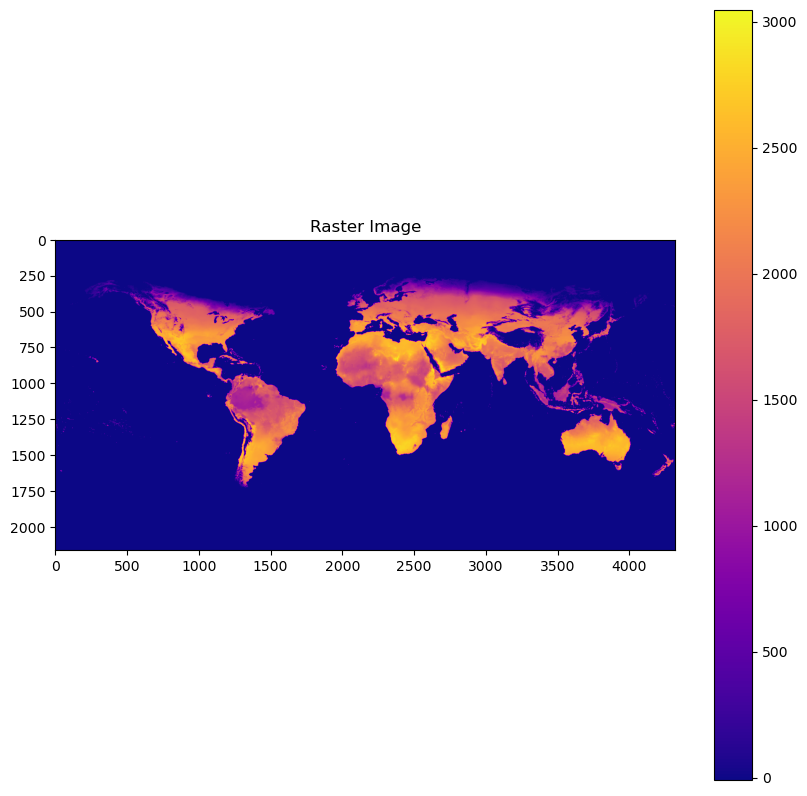

In [5]:
import rasterio

url = cell_c2.strip()  # Remove leading/trailing whitespace from the URL

with rasterio.open(url) as src:
    # Read the raster data
    data = src.read(1)  # Assuming a single band raster, change the band number if needed

    # Visualize the raster image
    plt.figure(figsize=(10, 10))
    plt.imshow(data, cmap='plasma')  # Display the raster using a colormap
    plt.colorbar()
    plt.title('Raster Image')
    plt.show()


Importing shapefiles for Indian states (Shapefiles taken from GADM)

In [6]:
import geopandas as gpd

# Specify the path to the shapefile (.shp) file
shapefile_path = "./shapefiles_india/gadm41_IND_shp/gadm41_IND_1.shp"

# Read the shapefile using geopandas
gdf = gpd.read_file(shapefile_path)

# Print the first few rows of the GeoDataFrame
print(gdf.head())


     GID_1 GID_0 COUNTRY               NAME_1   
0  IND.1_1   IND   India  Andaman and Nicobar  \
1  IND.2_1   IND   India       Andhra Pradesh   
2  IND.3_1   IND   India    Arunachal Pradesh   
3  Z07.3_1   Z07   India    Arunachal Pradesh   
4  IND.4_1   IND   India                Assam   

                          VARNAME_1 NL_NAME_1          TYPE_1   
0  Andaman & Nicobar Islands|Andama        NA  Union Territor  \
1                                NA        NA           State   
2  Agence de la Frontière du Nord-E        NA           State   
3  Agence de la Frontière du Nord-E        NA           State   
4                                NA        NA           State   

         ENGTYPE_1 CC_1 HASC_1  ISO_1   
0  Union Territory   NA  IN.AN     NA  \
1            State   NA  IN.AP  IN-AP   
2            State   NA  IN.AR  IN-AR   
3            State   NA  IN.AR     NA   
4            State   NA  IN.AS  IN-AS   

                                            geometry  
0  MULTIPOLY

Dsiplaying the shapefile for the states of Punjab, India and Kerala,India in order to perform the mapping on a small scale first before moving to the world map.

<Axes: title={'center': 'KERALA'}, xlabel='Longitude', ylabel='Latitude'>

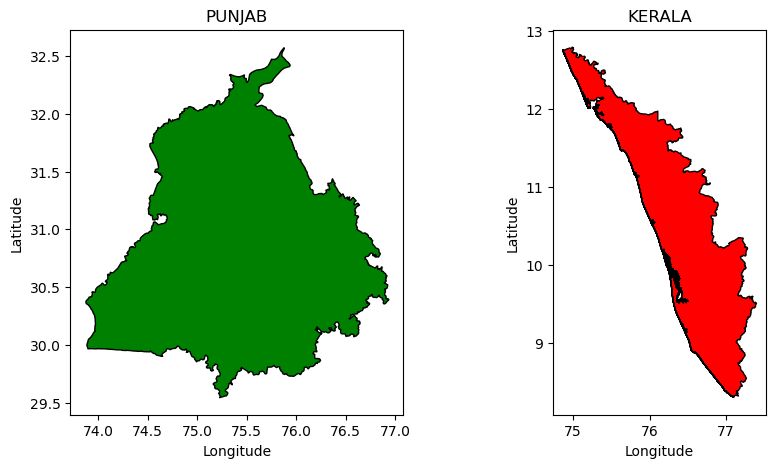

In [10]:
punjab = gdf[gdf['NAME_1']=='Punjab']
kerala = gdf[gdf['NAME_1']=='Kerala']
fig,axs= plt.subplots(1,2,figsize=(10,5))
axs[0].set_title('PUNJAB')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')
axs[1].set_title('KERALA')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')
punjab.plot(ax=axs[0], color = 'green', edgecolor='black')
kerala.plot(ax=axs[1], color = 'red', edgecolor='black')